In [6]:
# Name - Nalawade Prafulla Chandrashekhar.
# Class - BE Artificial Intelligence and Data Science.
# Roll No. - 42
# Practical No. 05 - Optimization of genetic algorithm parameter in hybrid genetic algorithm-neural network 
# modelling: Application to spray drying of coconut milk. 

In [ ]:
# Import Required Libraries

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [8]:
# Load and Preprocess Data

In [9]:
# Simulate dataset (replace with real-world data if available)
np.random.seed(42)
n_samples = 100
X = np.random.uniform(low=30, high=100, size=(n_samples, 2))  # e.g., temperature, feed rate
y = 0.8 * X[:, 0] - 0.5 * X[:, 1] + np.random.normal(0, 5, n_samples)  # Spray drying efficiency

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize inputs
X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std


In [10]:
# Define Neural Network

In [11]:
def build_nn(num_neurons, learning_rate):
    model = Sequential([
        Dense(num_neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mse')
    return model


In [12]:
# Genetic Algorithm for Optimization

In [13]:
# Define GA to optimize number of neurons and learning rate
def evaluate_fitness(individual):
    num_neurons = int(individual[0])  # Number of neurons
    learning_rate = individual[1]     # Learning rate
    
    model = build_nn(num_neurons, learning_rate)
    model.fit(X_train, y_train, epochs=20, verbose=0, batch_size=10)
    
    # Predict and calculate mean squared error on test set
    y_pred = model.predict(X_test, verbose=0)
    mse = mean_squared_error(y_test, y_pred)
    return mse,

# GA Configuration
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize MSE
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox.register("attr_num_neurons", random.randint, 5, 50)  # Range for neurons
toolbox.register("attr_learning_rate", random.uniform, 0.001, 0.01)  # Range for learning rate
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_num_neurons, toolbox.attr_learning_rate), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate_fitness)

# Run GA
random.seed(42)
population = toolbox.population(n=10)
ngen = 20
cxpb, mutpb = 0.5, 0.2

result, log = algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb,
                                   ngen=ngen, verbose=True)


gen	nevals
0  	10    
1  	7     
2  	4     
3  	9     
4  	8     
5  	7     
6  	6     
7  	7     
8  	10    
9  	7     
10 	7     
11 	8     
12 	4     
13 	6     
14 	4     
15 	6     
16 	6     
17 	4     
18 	9     
19 	6     
20 	3     


In [14]:
# Best Solution

In [15]:
best_individual = tools.selBest(population, k=1)[0]
print(f"Best Individual: Neurons={best_individual[0]}, Learning Rate={best_individual[1]}")

# Train and evaluate the final model
final_model = build_nn(int(best_individual[0]), best_individual[1])
final_model.fit(X_train, y_train, epochs=50, verbose=1, batch_size=10)

Best Individual: Neurons=35.783541031338736, Learning Rate=0.1778984213483502
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 294us/step - loss: 594.9189
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 191.7202  
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 110.8125 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.8250 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.7931 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.5930 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.7276 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.7487 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.0798 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 28.5966
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.4077 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.5163
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 22.7275
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.1348 
Ep

In [16]:
# Test the model
y_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
print(f"Final MSE on Test Data: {final_mse}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Final MSE on Test Data: 19.672812377118962


In [17]:
# Visualize Results

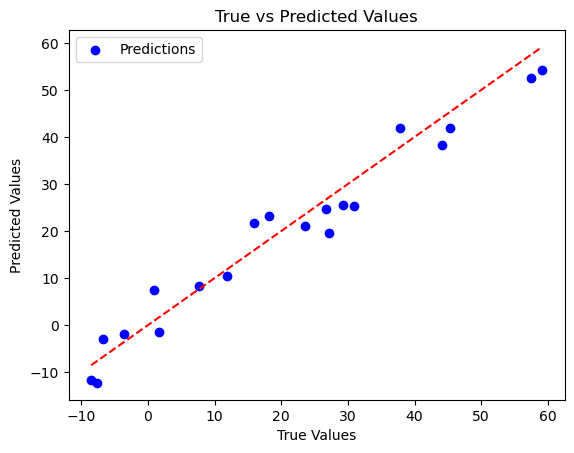

In [18]:
# Plot true vs predicted values
plt.scatter(y_test, y_pred, c='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("True vs Predicted Values")
plt.show()